In [18]:
import networkx as nx

G = nx.Graph()

G.add_node(1)

G.add_nodes_from([2, 3])

G.add_nodes_from(["u", "v"])

G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [19]:
G.add_edge(1, 2)

G.add_edge("u", "v")

G.add_edges_from([(1,3), (1,4), (1,5), (1,6)])

G.add_edge("u", "w")

G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')])

In [20]:
G.remove_node(2)

G.remove_nodes_from([4, 5])

G.nodes()

NodeView((1, 3, 'u', 'v', 6, 'w'))

In [21]:
G.number_of_nodes()

G.number_of_edges()

4

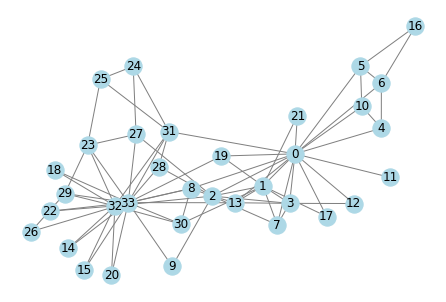

In [22]:
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.savefig("karate_graph.pdf")

C:\Users\iremu\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


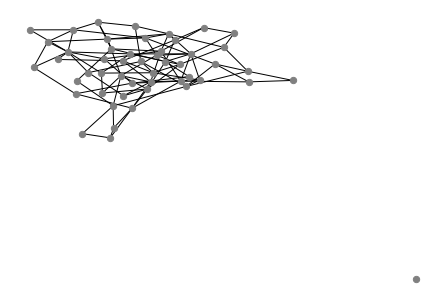

In [23]:
from scipy.stats import bernoulli

N=20
p=0.2

def er_graph(N, p):
    """Generate an er graph"""
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for node1 in G.nodes():
        for node2 in G.nodes():
            if node1<node2 and bernoulli.rvs(p=p):
                G.add_edge(node1, node2)
    return G
            
nx.draw(er_graph(50, 0.08), node_size=40, node_color="gray")
plt.savefig("er1.pdf")

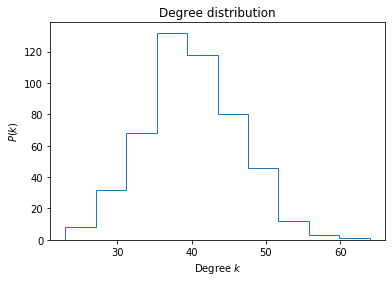

In [29]:
def plot_degree_distribution(G):
    plt.hist(list(dict(G.degree()).values()), histtype="step")
    plt.xlabel("Degree $k$")
    plt.ylabel("$P(k)$")
    plt.title("Degree distribution")
    
G = er_graph(500, 0.08)
plot_degree_distribution(G)
plt.savefig("hist1.pdf")

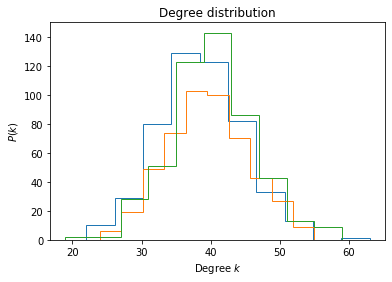

In [30]:
G1 = er_graph(500, 0.08)
plot_degree_distribution(G1)
G2 = er_graph(500, 0.08)
plot_degree_distribution(G2)
G3 = er_graph(500, 0.08)
plot_degree_distribution(G3)
plt.savefig("hist_3.pdf")

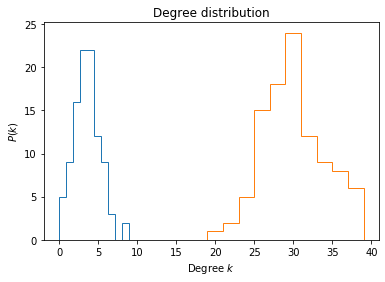

In [34]:
G1 = nx.erdos_renyi_graph(100, 0.03)
plot_degree_distribution(G1)
G2 = nx.erdos_renyi_graph(100, 0.30)
plot_degree_distribution(G2)

G1
Number of edges: 3405
Number of nodes: 843
Average degree: 8.08
G2
Number of edges: 3063
Number of nodes: 877
Average degree: 6.99


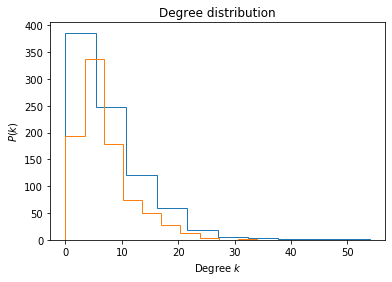

In [40]:
import numpy as np

A1 = np.loadtxt("adj_allVillageRelationships_vilno_1.csv", delimiter=",")
A2 = np.loadtxt("adj_allVillageRelationships_vilno_2.csv", delimiter=",")


G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

def basic_net_stats(G):
    print("Number of edges: %d" %G.number_of_edges())
    print("Number of nodes: %d" %G.number_of_nodes())
    degree_sequence = [d for n, d in G.degree()]
    print("Average degree: %.2f" % np.mean(degree_sequence))

print("G1")
basic_net_stats(G1)
print("G2")
basic_net_stats(G2)

plot_degree_distribution(G1)
plot_degree_distribution(G2)
plt.savefig("village_hist.pdf")

C:\Users\iremu\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


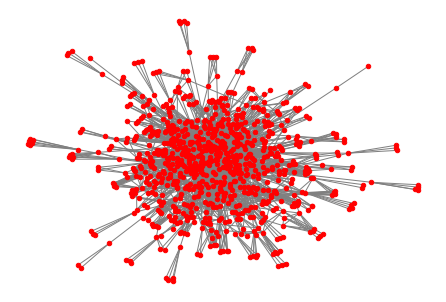

In [43]:
gen = nx.connected_component_subgraphs(G1)

G1_LCC = max(nx.connected_component_subgraphs(G1), key=len)
G2_LCC = max(nx.connected_component_subgraphs(G2), key=len)

plt.figure()
nx.draw(G1_LCC, node_color="red", edge_color="gray", node_size=20)
plt.savefig("village1.pdf")

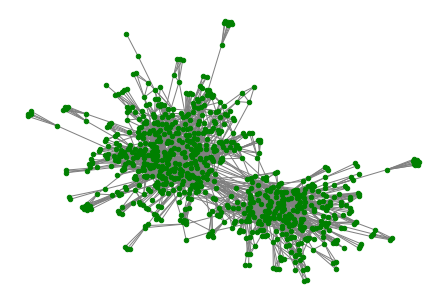

In [44]:
plt.figure()
nx.draw(G2_LCC, node_color="green", edge_color="gray", node_size=20)
plt.savefig("village2.pdf")